# EDA: word exploration 

In [8]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split


from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data/clean_data.csv') #pick best data set 

In [7]:
X = df['text']
y = df['target_col']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=42)

In [14]:
#pick best params

cv = CountVectorizer(stop_words=stopwords.words("english"),
                     max_features=None,
                     ngram_range=(1,1),
                     strip_accents='ascii' 
                    )

df_features = pd.DataFrame(cv.fit_transform(df['text']).todense(), \
                          columns=cv.get_feature_names())
# features.head()

In [16]:
df_features;

In [22]:
cp = df_features.loc[df['target_col'] == 0,:].copy()
ns = df_features.loc[df['target_col']== 1, :].copy()

#check to see if these are seperate data frames

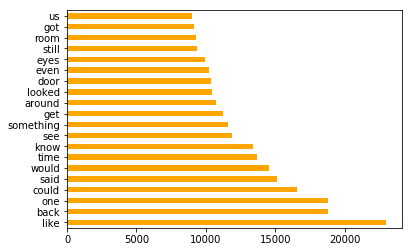

In [45]:
df_features.sum().sort_values(ascending=False).head(20).plot.barh(color='orange')

In [21]:
common_words = df_features.sum().sort_values(ascending=False).head(20).index

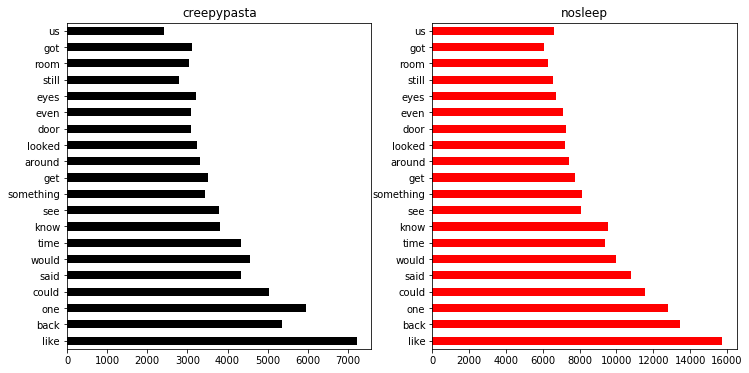

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

cp[common_words].sum().plot.barh(ax=ax1, title='creepypasta', color='Black')

ns[common_words].sum().plot.barh(ax=ax2, title='nosleep', color='red')

In [93]:
df_features.sum().sort_values(ascending=False).head(20).index

Index(['like', 'back', 'one', 'could', 'said', 'would', 'time', 'know', 'see',
       'something', 'get', 'around', 'looked', 'door', 'even', 'eyes', 'still',
       'room', 'got', 'us'],
      dtype='object')

In [91]:
ns.sum().sort_values(ascending=False).head(20)

like         15739
back         13445
one          12820
could        11524
said         10796
would         9979
know          9540
time          9358
something     8153
see           8055
get           7731
around        7399
door          7285
looked        7208
even          7104
eyes          6713
us            6609
still         6557
didnt         6488
room          6267
dtype: int64

## Unique Words

- got different results than presentation with differnt hyper parameters for count vec

- specifically strip_accents='ascii'

In [52]:
ns_df = df.loc[df['target_col']==1]
cp_df = df.loc[df['target_col']==0]

In [55]:
cv = CountVectorizer(stop_words=stopwords.words("english"),
                     max_features=None,
                     ngram_range=(1,1),
                     strip_accents='ascii' 
                    )

cp_features = pd.DataFrame(cv.fit_transform(cp_df['text']).todense(), \
                          columns=cv.get_feature_names())

ns_features = pd.DataFrame(cv.fit_transform(ns_df['text']).todense(), \
                          columns=cv.get_feature_names())

In [56]:
cp_features.shape

(5000, 38207)

In [57]:
ns_features.shape

(5000, 45819)

In [58]:
ns_edit = []

for i in ns_features: 
    ns_edit.append(i)

In [59]:
cp_edit = []

for i in cp_features: 
    cp_edit.append(i)

In [60]:
ns_only = []

for i in ns_edit:
    if i not in cp_edit:
        ns_only.append(i)

In [61]:
cp_only = []

for i in cp_edit:
    if i not in ns_edit:
        cp_only.append(i)

In [82]:
# ns_features[cp_only].sum()
# check to see if accurate

In [79]:
ns_features[ns_only].sum().sort_values(ascending=False).head(10)

caliban    170
mdash      162
josie      135
felipe     121
launa      120
tasha      103
herring     98
kentay      95
charice     91
cadriel     90
dtype: int64

In [89]:
cp_features[cp_only].sum().sort_values(ascending=False).head(10)

nicki        166
rhonnie      151
una          104
pashinyan     96
su            92
brindley      85
para          75
2ch           74
gregg         66
makiko        64
dtype: int64